In [8]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import uniform
import matplotlib.pyplot as plt
%matplotlib inline

# ポアソン分布

ポアソン分布(Poisson distribution)は、離散確率分布の一種である。オペレーションズリザーチ分野では多用されるもので、本書では一般化線形モデルに登場する。この分布のイメージを掴むのが難しいようなので、離散確率分布の中から抜き出して説明する。

## ポアソン分布の表現

ポアソン分布は、時間間隔$(0,t]$の中で平均$\lambda$回発生する確率事象が$k$回($k=0,1,2,...)$発生する確率を表現するのに用いられ、次式で示される。
$$
    P(X = k) = e^{-\lambda t} \frac{(\lambda t)^k}{k!}
$$
ポアソン分布に従う確率変数は、次の性質がある。
1. (独立性) 事象が起きるのは互いに独立である
2. (定常性) 事象が起きる確率はどの時間帯でも同じである
3. (希少性) 微笑時間$t$の間にその事象が2回以上起きる確率は無視できるくらい小さいとする
ポアソン分布が適応されている例として、交通事故発生率、1日に受け取る電子メールの件数、単位時間当たりのWebサーバへのアクセス数、単位時間あたりに店やATMなどを訪れる客の数などがある。

$\lambda$を変数としたときの$P(X = k), (k=0,1,\cdots,15)$の場合のグラフを得るスクリプトを次に示す。

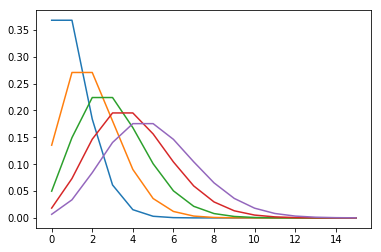

In [4]:
k = np.arange(0, 16)
for lamb in range(1, 6):
    p = poisson.pmf(k, lamb)
    plt.plot(k, p, label='lamb'+str(lamb))

## ポアソン分布の例

ある都市の交通事故は1日平均2.4件ある。1日に起こる交通事故の件数がポアソン分布に従うと仮定したとき、1日の交通事故が2件以下になる確率を求めよ。

In [5]:
lamb = 2.4
psum = 0
for k in [0, 1, 2]:
    p = poisson.pmf(k, mu=lamb)
    psum = psum + p
print('sum of p={}'.format(psum))

sum of p=0.5697087466575105


## ポアソン到着モデルのシミュレーション

オペレーションズリサーチ分野で待ち行列理論(queueing theory)がある。待ち行列は、銀行のATM、チケット販売窓口、スーパーマーケットのレジなどで客が待っている現象を指す。待ち行列シミュレーションの1つにポアソン到着モデルがある。このシミュレーション例を紹介する。

客がてんでばらばらに到着する場合、統計的性質である定常性、独立性、希少性が成り立つものと考え、到着のようすをポアソン分布で表現する。ある一定の$t$時間当たり到着する客の人数がポアソン分布に従うということを次式で表す。
$$
    P(k) = e^{-\lambda t} \frac{(\lambda t)^k}{k!}
$$
ここに、$k$は到着する客数、$\lambda$ [人/s]は平均到着率($t$時間当たりに到着する客数の平均値)で、この式は「$t$時間以内に$k$人の客が到着する確率」を表す。この到着のことをポアソン到着(poisson arrival)という。

いま、$t=1$とおいて単位時間当たり(単位時間には、1時間ごとや5分ごとなどが当てはまる)に到着する人数の確率を考える。
$$
    P(k) = e^{-\lambda} \frac{(\lambda)^k}{k!}
$$
この式を用いれば、例えば単位時間当たり平均6人($\lambda = 6$)であるときに、8人の客($k = 8$)が到着する確率は次となる。
$$
    P(8) = e^{-6} \frac{6^8}{8!} \approx 0.103
$$

### 到着時間の分布

ポアソン到着のとき、客の到着時間の間隔は指数分布に従う。このことを証明する。時間間隔$T$の間に事象が1回も起きない(すなわち、1人も客が到着しない)確率は
$$
    P(0) = e^{-\lambda T}
$$
であり、これは見方を変えると、事象が起きる時間間隔が$T$より長い確率は
$$
    P^{c}(T) = e^{-\lambda T}
$$
で表されるといってよい。ここで$P$の上付きの$c$はcomplementを表している。したがって、事象が起きる時間間隔は$T$以下、すなわち、ある客が到着してから$T$時間以内で次の客が到着する確率は
$$
    P_{arr}(T) = 1 - P^{c}(T) = 1 - e^{-\lambda T}
$$
となり、上式の両辺を$T$で微分して次式を得る。
$$T = 
    f_{arr}(T) = \lambda e^{-\lambda T}
$$
これは、指数分布(exponential distribution)である。すなわち、ポアソン到着のとき、客の到着時間は指数分布に従うことが分かる。

シミュレーションにおいて、確率変数である$T$を発生させない場合、以下を得る。
$$
    T = -\frac{1}{\lambda}\, \log{e} \,(1 - P_{arr}(T))
$$
式中の$P_{arr}(t)$に一様乱数$U(0,1)$を与えることで、$T$を生成できる。ここで、$U(0,1)$の性質から$1-P_{arr}$と$P_{arr}(T)$の統計的性質は同じである。
これより、
$$
    T = -\frac{1}{\lambda} \log{e} P_{arr}(T)
$$
を用いても、統計的な結果は同じである。

Num人分の客の到着時刻をシミュレーションするスクリプトを次に示す。ここに、$\lambda = 1$ (lamb = 1)とおいた。

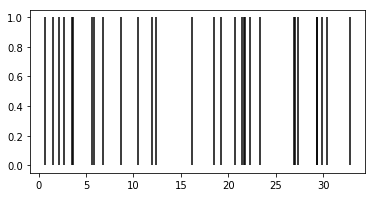

In [9]:
Num = 30 # the number of arrival
t_arrive = np.zeros(Num)
lamb = 1 # lambda

sum = 0.0
for i in range(Num):
    sum = sum - (1 / lamb) * np.log(uniform.rvs(size=1))
    t_arrive[i]= sum

fig, ax = plt.subplots(figsize=(6,3))
ax.vlines(t_arrive, ymin=0, ymax=1)

この図は、客が到着した時刻に縦線が引かれている。横軸は単位時間である。この図における$\lambda = 1$の分布形状を考慮して、時間間隔が開くほどに客の到着確率が低くなることが、この結果から見て取れる。まさしく、客の到着時間の間隔の確率は指数状である。